In [1]:
import numpy as np 
import pandas as pd 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [3]:
df = pd.read_csv("healthcare_dataset.csv")

In [4]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Billing Amount'}>],
       [<Axes: title={'center': 'Room Number'}>, <Axes: >]], dtype=object)

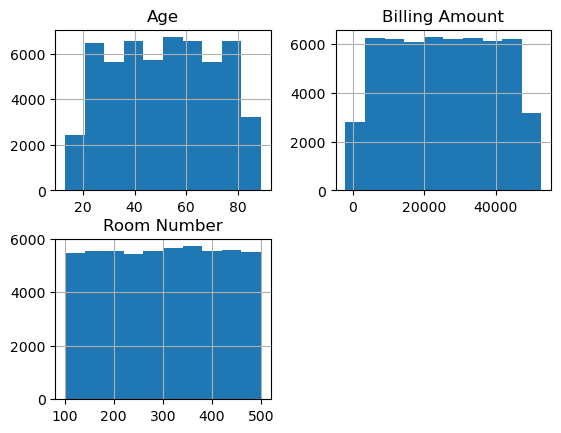

In [7]:
df.hist()

In [8]:
train_df = pd.read_csv("healthcare_dataset.csv")
test_df = pd.read_csv("healthcare_dataset.csv")

In [10]:
print(train_df.columns)


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [11]:
train_df = pd.read_csv('healthcare_dataset.csv')

## with google

In [15]:
pip install googletrans==4.0.0-rc1


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------- ----------------- 30.7/55.1 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 51.2/55.1 kB 525.1 kB/s eta 0:00:01
   ---------------------------------------- 55.1/55.1 kB 477.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ------------ --------------------------- 41.0/133.4 kB ? eta -:--:--
   ------------------------ --------------- 81.9/133.4 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------ 92.2/133.4 kB 871.5 kB/s eta 0:00:01
   -------------------------------------- 133.4/133.4 kB 715.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
from googletrans import Translator

def translate_to_hindi(text):
    """
    Translate the given text to Hindi.

    Parameters:
    - text: The input text to be translated.

    Returns:
    - Translated text in Hindi as a string.
    """
    translator = Translator()
    try:
        translated = translator.translate(text, dest='hi')
        return translated.text
    except Exception as e:
        return f"Error: {str(e)}"


In [17]:
text = "How are you?"
translated_text = translate_to_hindi(text)
print(translated_text)  


आप कैसे हैं?


## using ollama

In [ ]:
import ollama

def translate_to_hindi(text):
    """
    Translate the given text to Hindi using Ollama.

    Parameters:
    - text: The input text to be translated.

    Returns:
    - Translated text in Hindi as a string.
    """
    try:
        
        client = ollama.Client()
        
       
        translated_text = client.translate(text, target_language='hi')
        
        return translated_text
    except Exception as e:
        return f"Error: {str(e)}"


In [18]:
text = "what is your age?"
translated_text = translate_to_hindi(text)
print(translated_text)

तुम्हारी उम्र क्या है?


In [28]:
import ollama

def translate_text(text, source_language='en', target_language='hi'):
    """
    Translate the given text from the source language to the target language using Ollama's Mistral model.

    Parameters:
    - text: The input text to be translated.
    - source_language: The language code of the source text (default is 'en' for English).
    - target_language: The language code for the translation (default is 'hi' for Hindi).

    Returns:
    - Translated text in the target language as a string.
    """
    try:
        client = ollama.Client()

        translated_text = client.translate(text, source_language=source_language, target_language=target_language)
        
        return translated_text
    except Exception as e:
        return f"Error: {str(e)}"



TypeError: Client.__init__() got an unexpected keyword argument 'follow_redirects'